# Learning and Decision Making

## Laboratory 5: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The key world domain

Consider once again the gridworld domain from Lab 2 and which you modeled using a Markov decision process.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in Lab 2, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [1]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# States
X = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

nX = len(X)

initial_state = X[10]
goal_state = X[13]

# Actions
A = ['U', 'D', 'L', 'R']

nA = len(A)

# Transition probabilities for the hare
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Cost function
             
c = np.array([[1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [0.0, 0.0, 0.0, 0.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0]])

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [2]:
cost_up = c[:,[0]]
cost_down = c[:,[1]]
cost_left = c[:,[2]]
cost_right = c[:,[3]]


J = np.zeros((nX, 1))
Q = np.zeros((nX, nA))
err = 1

while err > 1e-8:
    Qup = cost_up + gamma * U.dot(J)
    Qdown = cost_down + gamma * D.dot(J)
    Qleft = cost_left + gamma * L.dot(J)
    Qright = cost_right + gamma * R.dot(J)
    
    Jnew = np.min((Qup, Qdown, Qleft, Qright), axis=0)
    Qnew = np.column_stack((Qup, Qdown, Qleft, Qright))
    
    err = la.norm(Qnew - Q)
    J = Jnew
    Q = Qnew

Q_star = Q
print(Q_star)

[[ 5.84607096  5.84607096  5.84607096  4.89502117]
 [11.57144785 10.67823015 11.57144785 12.45352817]
 [ 7.0200601   7.9475408   6.08086879  7.9475408 ]
 [ 4.65725873  3.69420073  5.60830851  3.69420073]
 [12.67404825 11.79196793 11.79196793 12.67404825]
 [ 8.17941097  9.09532707  7.25193028  8.17941097]
 [ 3.45343623  2.47821842  4.41649423  3.45343623]
 [11.34814342  9.55043002 10.45492572 11.34814342]
 [ 7.25193028  9.09532707  8.17941097  9.09532707]
 [ 4.41649423  4.41649423  3.45343623  2.47821842]
 [12.45352817 11.57144785 10.67823015 11.57144785]
 [ 8.40839     9.3243061   8.40839     9.3243061 ]
 [ 3.20963178  2.23441397  3.20963178  1.24688279]
 [ 0.          0.          0.98753117  0.        ]
 [ 8.40839     9.3243061   9.3243061   9.3243061 ]
 [ 3.69420073  4.65725873  4.65725873  4.65725873]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [3]:
#Select random action with probability epsilon,
#and select the greedy action with probability 1-epsilon

def select_random_action(Q, state, epsilon=0.1):
    Q_values = Q[X.index(state)]
    greedy_indexes = np.where(Q_values == min(Q_values))[0] #Find the action(s) with the lowest Q-value
    greedy_action = A[np.random.choice(greedy_indexes)] #Randomize if more than one action with the same value
    return np.random.choice([np.random.choice(A), greedy_action], p=[epsilon, 1-epsilon])
    

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the vehicle to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

[[ 5.80523042  5.80807053  5.78642309  4.86813662]
 [11.2963617  10.60347336 11.57821075 11.0999725 ]
 [ 6.9086698   7.73138959  6.02601224  7.91504772]
 [ 4.63747271  3.877845    5.44708242  3.71219879]
 [12.46271643 11.59936467 12.36239911 12.70436081]
 [ 8.05295705  8.11563404  7.16035123  8.07896939]
 [ 3.41769607  2.46987003  4.50184023  3.39175202]
 [11.22935952  9.38862569 10.48597789 11.12361716]
 [ 7.17142927  8.91109372  8.08804991  8.93277069]
 [ 4.21379471  4.1089464   3.30322762  2.43165507]
 [12.20154684 11.32926046 10.49783235 11.32778209]
 [ 8.36428008  8.42501546  8.22127838  9.10832478]
 [ 3.20465147  2.16901574  2.80856136  1.21627217]
 [ 0.          0.          0.85345593  0.        ]
 [ 8.31850655  9.20882911  9.19185464  9.19030582]
 [ 3.7645877   4.3261979   4.52315661  4.44389752]]


<IPython.core.display.Javascript object>


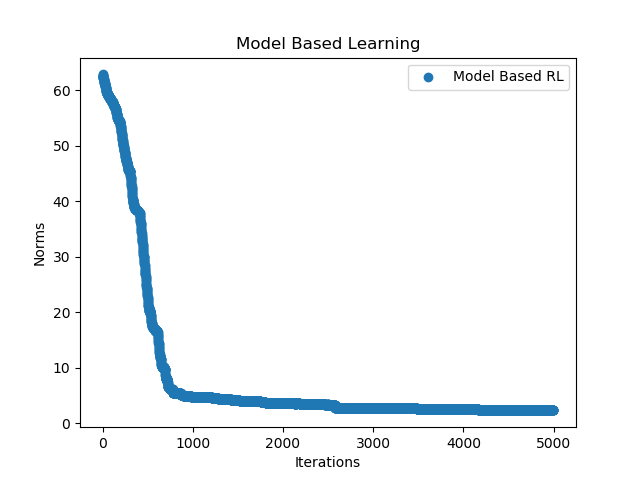

In [4]:
#General
def indicator(x_next, y):
    if x_next == y:
        return 1
    return 0

def alpha(x, a, N):
    return 1/(N[x][a] + 1)

def probability_update(x, a, x_next, P_mbrl, N):
    action = a #Used for lookup in P_mbrl dictionary
    x = X.index(x) #Used as index
    a = A.index(a) #Used as index
    x_next = X.index(x_next) #Used as index
    
    for y in range(nX):
        P_mbrl[action][x][y] = P_mbrl[action][x][y] + alpha(x, a, N) * (indicator(x_next, y) - P_mbrl[action][x][y])

def cost_update(x, a, c, c_mbrl, N):
    x = X.index(x)
    a = A.index(a)
    c_mbrl[x][a] = c_mbrl[x][a] + alpha(x, a, N) * (c - c_mbrl[x][a])
    
def Q_update_mbrl(x, a, c, P_mbrl, c_mbrl):
    action = a #Used for lookup in P_mbrl dictionary
    x = X.index(x) #Used as index
    a = A.index(a) #Used as index
    
    sum = 0
    for y in range(nX):
        sum = sum + P_mbrl[action][x][y] * np.amin(Q_mbrl[y])
    Q_mbrl[x][a] = c_mbrl[x][a] + gamma * sum
    
    
def get_P_matrix(a):
    if a == 'U': return U
    elif a == 'D': return D
    elif a == 'L': return L
    elif a == 'R': return R
    else: raise ValueError('Invalid action.')
    
def run_iterations(Q_function, method):
    # Initialization
    P_mbrl_U = np.eye(nX, nX)
    P_mbrl_D = np.eye(nX, nX)
    P_mbrl_L = np.eye(nX, nX)
    P_mbrl_R = np.eye(nX, nX)
    P_mbrl = {'U':P_mbrl_U, 'D':P_mbrl_D, 'L':P_mbrl_L, 'R':P_mbrl_R}

    c_mbrl = np.zeros((nX, nA))
    N = np.zeros((nX, nA))
    
    
    iterations_list = []
    norms_list = []
    
    iterations = 5000
    epsilon = 0.1
    x_t = initial_state
    
    
    #Execution
    for iteration in range(iterations):
        a_t = select_random_action(Q_mbrl, x_t)
        c_t = c[X.index(x_t)][A.index(a_t)]
        N[X.index(x_t)][A.index(a_t)] += 1 #One extra visit to this (x,a) pair
        x_next = X[np.random.choice(range(nX), p=get_P_matrix(a_t)[X.index(x_t)])]

        probability_update(x_t, a_t, x_next, P_mbrl, N)
        cost_update(x_t, a_t, c_t, c_mbrl, N)
        
        if method == 'activity3': 
            Q_update_mbrl(x_t, a_t, c_t, P_mbrl, c_mbrl)
        elif method == 'activity4': 
            Q_update_ql(x_t, a_t, c_t, x_next)
        elif method == 'activity5' : 
            a_next = select_random_action(Q_sarsa, x_next)
            Q_update_sarsa(x_t, a_t, c_t, x_next, a_next)
        else: 
            raise ValueError('Invalid method.')

        if x_t == goal_state:
            x_next = X[np.random.choice(range(nX))] #reset the position to a random state
        x_t = x_next #Make one further step when the goal state is reached

        iterations_list += [iteration]
        norms_list += [la.norm(Q_star - Q_function)]
        
    return iterations_list, norms_list
        
        
#Activity 3

Q_mbrl = np.zeros((nX, nA))
iterations_mbrl, norms_mbrl = run_iterations(Q_mbrl, 'activity3')


print(Q_mbrl)
plt.figure(1)
plt.scatter(iterations_mbrl, norms_mbrl, label='Model Based RL')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Norms')
plt.title("Model Based Learning")
plt.show()


### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

[[13.01278599 11.75191256 13.33170402 13.86827361]
 [11.36673349 18.34558323  3.94177423  5.78043577]
 [14.26978317 14.1646695  14.88363234 14.14538439]
 [11.7518527  10.79792653 12.07730243 13.03724768]
 [ 5.00702338 18.3087045   3.94177423  6.28991059]
 [ 1.7698291   0.         15.27762627  4.66923523]
 [ 8.99910141 10.61641621 12.19922947 11.75801013]
 [15.7779866  17.2964822  14.57598995 11.15352006]
 [15.62247442 13.75094036 13.68400155 14.41904031]
 [ 9.81956206  5.02604156  7.08287031 10.56392358]
 [ 9.1218775   9.61572731 18.0566476  12.82191639]
 [ 4.73243726  5.04913011 16.3829487   0.        ]
 [ 9.49899914  8.98284866  9.68900087  8.55286026]
 [ 7.53365566  7.53560256  7.61614482  7.53113092]
 [16.45493008 13.25257924 14.4615849  15.64159427]
 [11.24089882  2.80618477  4.56793779  2.3774023 ]]


<IPython.core.display.Javascript object>


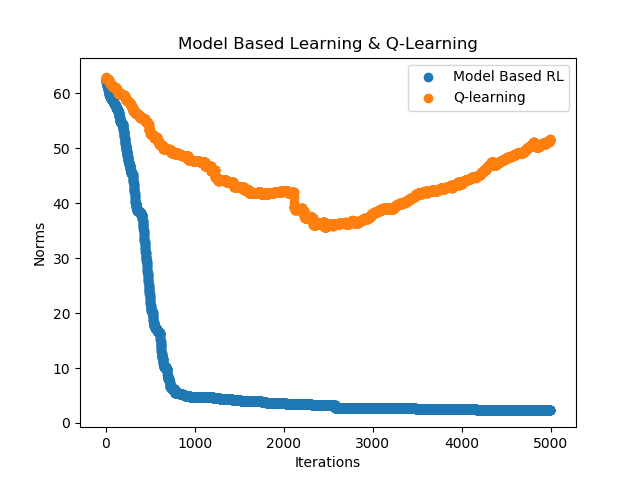

In [5]:
def Q_update_ql(x, a, c, x_next):
    alpha = 0.3
    x = X.index(x)
    a = A.index(a)
    x_next = X.index(x_next)
    
    Q_ql[x][a] = Q_ql[x][a] + alpha*(c + gamma * np.amax(Q_ql[x_next]) - Q_ql[x][a])
    
    
    
Q_ql = np.zeros((nX, nA))
iterations_ql, norms_ql = run_iterations(Q_ql, 'activity4')


print(Q_ql)
plt.figure(2)
plt.scatter(iterations_mbrl, norms_mbrl, label='Model Based RL')
plt.scatter(iterations_ql, norms_ql, label='Q-learning')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Norms')
plt.title("Model Based Learning & Q-Learning")
plt.show()

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

[[2.66818507 3.13961525 2.26370744 2.96734958]
 [0.5991     2.01550968 0.5991     0.51      ]
 [2.16762844 2.00687491 2.88949709 1.30928099]
 [2.77066252 1.86524445 2.97714855 3.04478234]
 [0.657      1.00002909 0.         0.3       ]
 [0.5991     0.5991     2.25455408 0.3       ]
 [3.03006634 2.35391268 3.12266985 2.9520918 ]
 [1.12943421 2.43782672 1.35685383 1.01976376]
 [2.53657549 1.51461211 2.23946467 1.7373384 ]
 [1.55390863 0.9855903  0.8349327  2.19940161]
 [0.3        0.         2.02435228 0.7599    ]
 [1.1080413  0.3        2.34248563 0.5991    ]
 [2.90571493 2.36105899 1.73510452 1.35950436]
 [0.02550358 0.02544267 1.19507626 0.02643117]
 [2.51121505 1.49102696 1.79342618 1.70009777]
 [1.70958096 0.955029   0.3        0.3       ]]


<IPython.core.display.Javascript object>


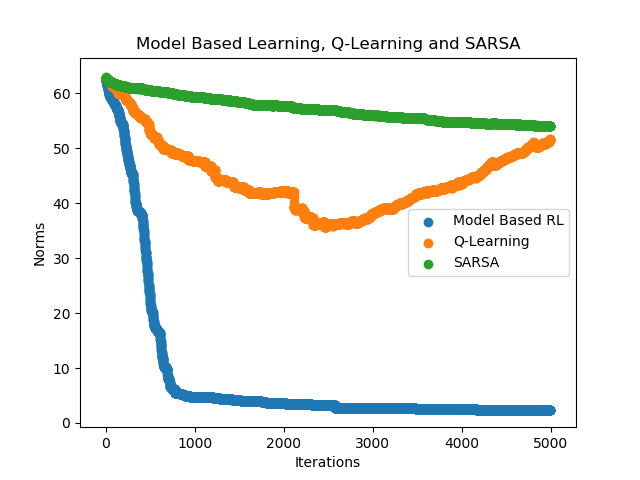

In [6]:
def Q_update_sarsa(x, a, c, x_next, a_next):
    alpha = 0.3
    x = X.index(x)
    a = A.index(a)
    x_next = X.index(x_next)
    a_next = A.index(a_next)
    
    Q_sarsa[x][a] = Q_sarsa[x][a] + alpha * (c + gamma * Q_sarsa[x_next][a_next] - Q_sarsa[x][a])


Q_sarsa = np.zeros((nX, nA))
iterations_sarsa, norms_sarsa = run_iterations(Q_sarsa, 'activity5')


print(Q_sarsa)
plt.figure(3)
plt.scatter(iterations_mbrl, norms_mbrl, label='Model Based RL')
plt.scatter(iterations_ql, norms_ql, label='Q-Learning')
plt.scatter(iterations_sarsa, norms_sarsa, label='SARSA')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Norms')
plt.title("Model Based Learning, Q-Learning and SARSA")
plt.show()

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

Insert your comments here.